# 1 - Load the data file using pandas. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/PaulRuddock/Downloads/1569582940_googleplaystore/googleplaystore.csv")

# 2 - Check for null values in the data. Get the number of null values for each column.

In [3]:
pd.isnull(data).sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3 - Drop records with nulls in any of the columns. 

In [4]:
data=data.dropna()

In [5]:
pd.isnull(data).sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.1 - Variables seem to have incorrect type and inconsistent formatting. You need to fix them

In [6]:
data.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [7]:
def conversion(Size):
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'K' in Size:
        x=Size[:-1]
        x=float(x)
        return print(x)
    else:
        return None

In [8]:
conversion('50K')

50.0


In [9]:
data.Size=data.Size.apply(conversion)

In [10]:
data.Size.fillna(method='ffill',inplace=True)

In [11]:
data.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839     3600.0
10840    19000.0
Name: Size, Length: 9360, dtype: float64

# 4.2 - Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [12]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
data.Reviews=data.Reviews.astype('int')

In [14]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 4.3 - Installs field is currently stored as string and has values like 1,000,000+.

In [16]:
data.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9360, dtype: object

In [17]:
data.Installs = data.Installs.str.replace(",","")

In [18]:
data.Installs = data.Installs.str.replace("+","")

In [19]:
data.Installs = data.Installs.astype('int')

In [20]:
data.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int32

# 4.4 - Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [21]:
data.Price.sort_values(ascending=True)

2300     $0.99
3405     $0.99
6936     $0.99
7665     $0.99
4260     $0.99
         ...  
3313         0
3314         0
3315         0
3309         0
10840        0
Name: Price, Length: 9360, dtype: object

In [22]:
data.Price=data.Price.str.replace("$"," ")

In [23]:
data.Price=data.Price.apply(float)

# 5 - Sanity checks:
# 5.1 - Ratings should be between 1 and 5 only

In [24]:
data.Rating.min()

1.0

In [25]:
data.Rating.max()

5.0

In [26]:
# as above, all ratings are between 1.0 and 5.0 therefore no outliers to drop

# 5.2 - Reviews should not be more than Installs

In [27]:
data[data.Reviews>data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [28]:
data=data[data.Reviews<=data.Installs]

In [29]:
data[data.Reviews>data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [30]:
# 5.3
data[(data.Type=="Free") & (data.Price!=0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [31]:
# as above, there are no "Free" apps with price not 0

# 5.  Performing univariate analysis: 
# Boxplot for Price

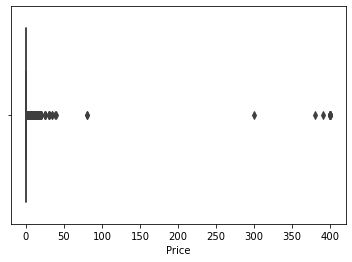

In [32]:
sns.boxplot(data.Price)
plt.show()

In [33]:
# There are outliers, a huge majority of apps on the appstore are either free or low priced
# From a visual perspective, we can see that the 5 values more then 50 are outliers.

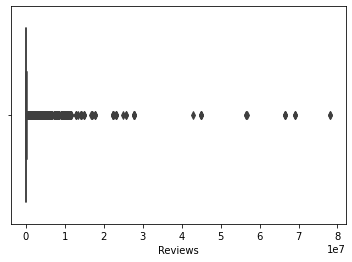

In [34]:
# Boxplot for Reviews
sns.boxplot(data.Reviews)
plt.show()

In [35]:
# there are some apps that have far more reviews than others, however this can simply be attributed to the popularity and
# number of installs on these apps, we have already removed the apps that have more  reviews than installs.
# For instance, Twitter will have far more reviews than a small app with only a few hundred installs

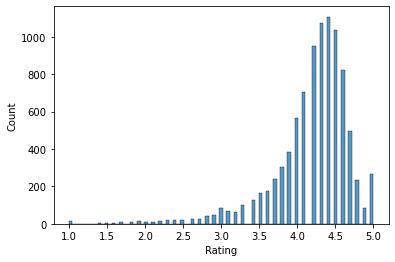

In [36]:
# Histogram for Rating
sns.histplot(data.Rating)
plt.show()

In [37]:
# as above, the Ratings are left-skewed, weighted towards higher Ratings.

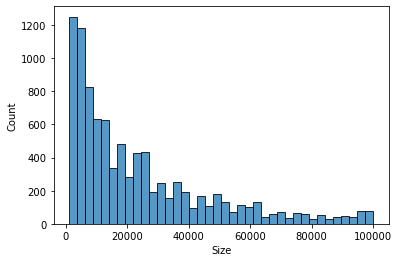

In [38]:
# Histogram for Size
sns.histplot(data.Size)
plt.show()

In [39]:
# Right skewed, most apps appear to be smaller in size, there are however still a number of apps larger in size.

# 6 - Outlier treatment: 

# 6.1 Price: From the box plot, it seems like there are some apps with very high price. 
   # A price of $200 for an application on the Play Store is very high and suspicious!

In [40]:
data[data.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,22000.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
# above apps appear to be spam, judging by the app name, we will now drop these records

In [42]:
data=data[data.Price<=200]

In [43]:
data[data.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 6.1 - Reviews: Very few apps have very high number of reviews. 
# These are all star apps that don’t help with the analysis and, in fact, will skew it. 
# Drop records having more than 2 million reviews.

In [44]:
len(data[data.Reviews>2000000])

453

In [45]:
data=data[data.Reviews<=2000000]

In [46]:
len(data[data.Reviews>2000000])

0

# 6.2 Installs:  There seems to be some outliers in this field too. 
# Apps having very high number of installs should be dropped from the analysis.

In [47]:
print(np.percentile([data.Installs],10))
print(np.percentile([data.Installs],25))
print(np.percentile([data.Installs],50))
print(np.percentile([data.Installs],70))
print(np.percentile([data.Installs],90))
print(np.percentile([data.Installs],95))
print(np.percentile([data.Installs],99))

1000.0
10000.0
500000.0
1000000.0
10000000.0
10000000.0
100000000.0


In [48]:
# from the above information, we can see that 70% of the entries have installs less than 1M, 
# and that 95% have values less than 10M, at 99% there is a huge jump to 100M.
# I believe we should opt to drop entries above the 95th percentile, as that drops the records 
# between 95th and 99th percentile, where there is a 1000% jump in installs.

In [49]:
data=data[data.Installs<=10000000]

# Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., 
# our target variable rating. Make scatter plots (for numeric features) 
# and box plots (for character features) to assess the relations between rating and the other features.

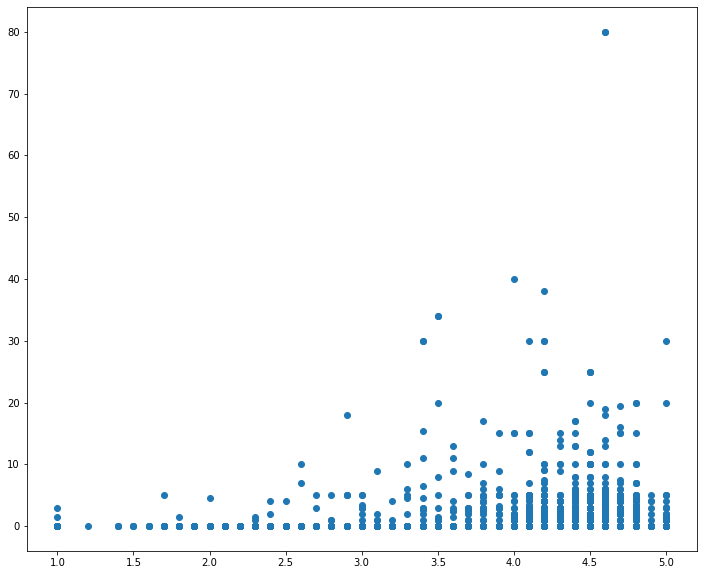

In [50]:
plt.figure(figsize = [12,10])
plt.scatter(x=data.Rating,y=data.Price)

In [51]:
# there is a positively skewed relationship between rating and price

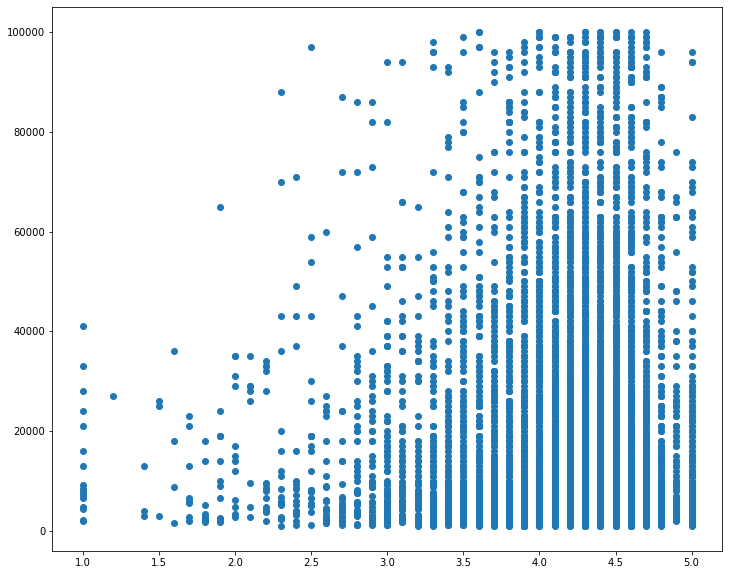

In [52]:
plt.figure(figsize = [12,10])
plt.scatter(x=data.Rating,y=data.Size)

In [53]:
# positive skew, heavier apps typically do not have extremely low ratings, with a min of 2-2.5

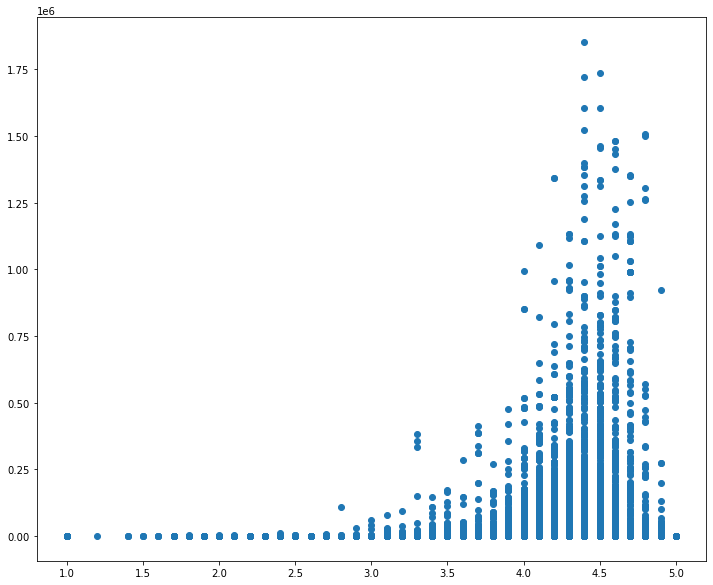

In [54]:
plt.figure(figsize = [12,10])
plt.scatter(x=data.Rating,y=data.Reviews)

In [55]:
# more reviews typically is followed by higher ratings, from 0.5le6 and more reviews, there are no ratings below 4

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

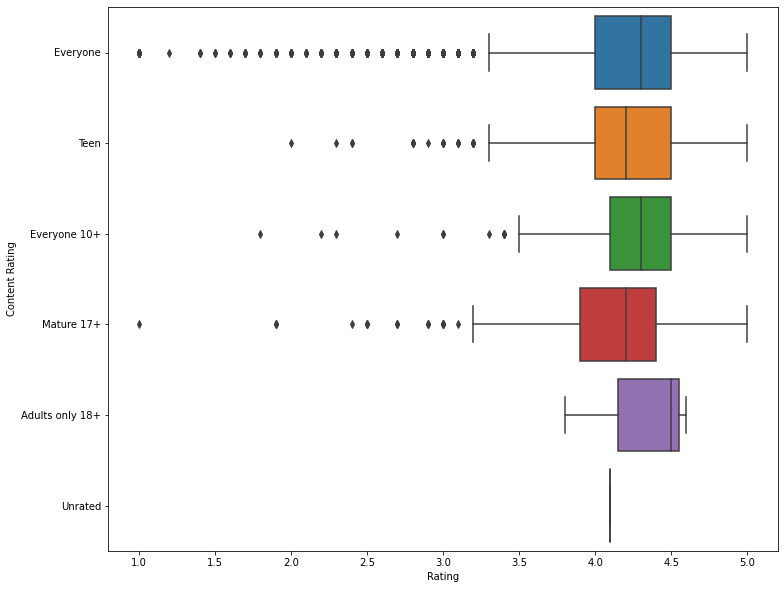

In [56]:
plt.figure(figsize = [12,10])
sns.boxplot(x=data.Rating,y=data['Content Rating'])

In [57]:
# adult only apps do not have any poor reviews and have a higher median than others. The other Content Ratings
# (other than unrated) all have some poor reviews, though could be outliers, further investigation needed.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

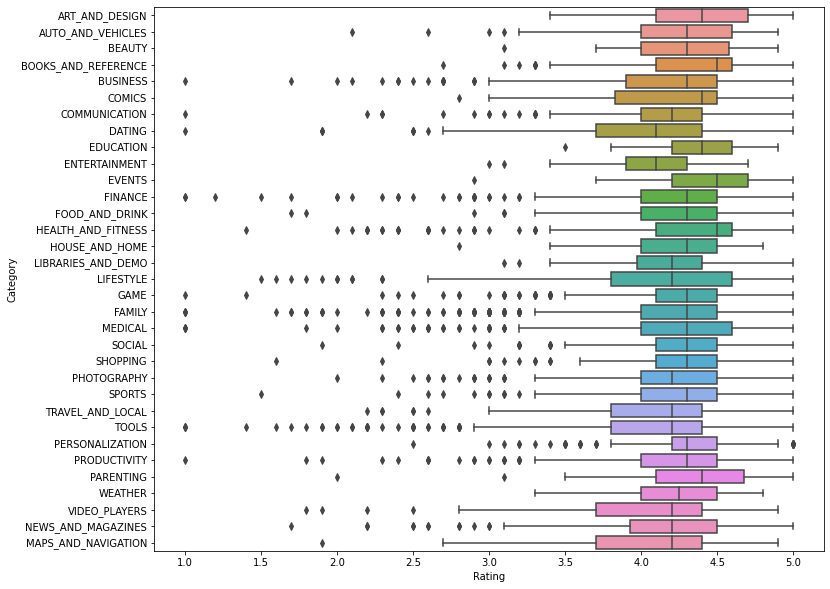

In [58]:
plt.figure(figsize = [12,10])
sns.boxplot(x=data.Rating,y=data.Category)

In [59]:
# although Events has the same median as a few other categories, its upper quartile is by far superior to the others,
# making Events the best rated category.

# 8-12 - Data preprocessing

Train Test Split, Linear Regression, Predictions on test set, R2

In [60]:
inp1=data.copy()

In [61]:
inp1.Installs = inp1.Installs.apply(np.log1p)
inp1.Reviews = inp1.Reviews.apply(np.log1p)

In [62]:
inp1.drop(["App","Last Updated","Current Ver","Android Ver","Type"],axis=1,inplace=True)

In [63]:
inp2=pd.get_dummies(inp1, columns = ['Category', 'Genres', 'Content Rating'])

In [64]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,4.5,4.744932,3600.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [67]:
df_train.shape, df_test.shape

((5947, 159), (2549, 159))

In [68]:
y_train = df_train.pop("Rating")
x_train = df_train

In [69]:
y_test = df_test.pop("Rating")
x_test = df_test

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
linear_reg=LinearRegression()

In [72]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [73]:
from sklearn.metrics import r2_score

y_train_pred= linear_reg.predict(x_train)

r2_score(y_train, y_train_pred)

0.16060484968954036

In [74]:
y_test_pred= linear_reg.predict(x_test)

r2_score(y_test, y_test_pred)

0.1444448337388573